In [1]:
#import the important packages
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [2]:
Electricity_Consume = pd.read_csv('Electricity Consumption.csv')

In [3]:
Electricity_Consume.head(20)

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107
5,6/1/1973,36.4823
6,7/1/1973,39.1412
7,8/1/1973,41.4137
8,9/1/1973,40.1639
9,10/1/1973,37.1133


In [4]:
Electricity_Consume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [5]:
#converting the object type date to datetime type
Electricity_Consume['DATE'] = pd.to_datetime(Electricity_Consume.DATE, format='%m/%d/%Y')

In [6]:
Electricity_Consume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATE                          561 non-null    datetime64[ns]
 1   Electricty_Consumption_in_TW  561 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.9 KB


**Setting the time data column as the index.**

In [7]:
Electricity_Consume.set_index(Electricity_Consume.DATE, inplace=True)

In [8]:
Electricity_Consume

,DATE,Electricty_Consumption_in_TW
DATE,,
1973-01-01,1973-01-01,35.9728
1973-02-01,1973-02-01,36.1334
1973-03-01,1973-03-01,35.0625
1973-04-01,1973-04-01,33.8416
1973-05-01,1973-05-01,33.5107
...,...,...
2019-05-01,2019-05-01,97.5860
2019-06-01,2019-06-01,110.8580
2019-07-01,2019-07-01,122.1014


In [9]:
Electricity_Consume['year'] = Electricity_Consume.DATE.dt.year
Electricity_Consume['month'] = Electricity_Consume.DATE.dt.month

In [10]:
Electricity_Consume.head(10)

,DATE,Electricty_Consumption_in_TW,year,month
DATE,,,,
1973-01-01,1973-01-01,35.9728,1973,1
1973-02-01,1973-02-01,36.1334,1973,2
1973-03-01,1973-03-01,35.0625,1973,3
1973-04-01,1973-04-01,33.8416,1973,4
1973-05-01,1973-05-01,33.5107,1973,5
1973-06-01,1973-06-01,36.4823,1973,6
1973-07-01,1973-07-01,39.1412,1973,7
1973-08-01,1973-08-01,41.4137,1973,8
1973-09-01,1973-09-01,40.1639,1973,9


In [11]:
Consumption = Electricity_Consume.Electricty_Consumption_in_TW
Consumption

DATE
1973-01-01     35.9728
1973-02-01     36.1334
1973-03-01     35.0625
1973-04-01     33.8416
1973-05-01     33.5107
                ...   
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricty_Consumption_in_TW, Length: 561, dtype: float64

<AxesSubplot:xlabel='DATE'>

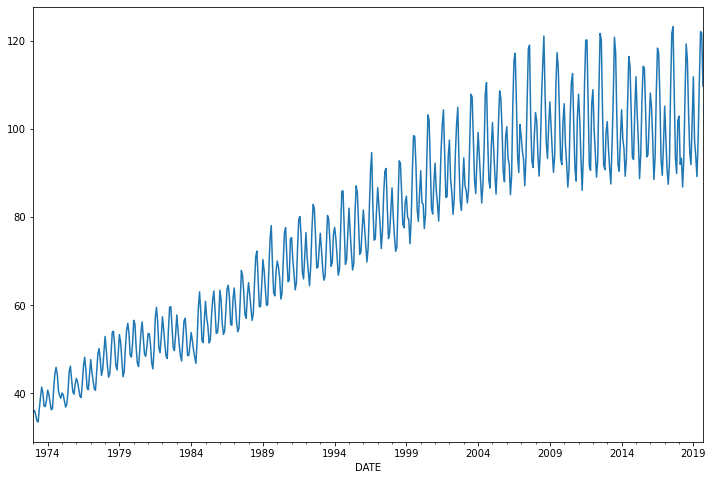

In [12]:
Consumption.plot(figsize = (12,8))

**We can see that the time series data we have contains an increasing trend and also the month over month seasonality.**

# Checking the trend in the Time Series data.

In [13]:
pd.pivot_table(data = Electricity_Consume, index = 'year', columns = 'month', values = 'Electricty_Consumption_in_TW')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1973,35.9728,36.1334,35.0625,33.8416,33.5107,36.4823,39.1412,41.4137,40.1639,37.1133,37.0248,38.4341
1974,40.7455,39.8340,37.9408,36.3004,36.5293,40.8899,44.3563,45.9240,44.4555,40.6417,39.4901,38.9068
1975,40.0956,39.6944,38.3040,36.8939,37.5668,40.3832,44.9671,46.1853,43.3001,40.3836,39.8092,42.0597
1976,43.4099,42.5826,40.9244,39.3533,39.0766,42.4851,46.3693,48.1945,45.1688,41.1880,40.8431,44.1468
1977,47.6892,44.8505,42.8557,41.0177,40.7201,45.0610,48.9685,50.1898,47.5982,44.0684,45.4267,49.3447
1978,52.9153,49.9488,46.1749,43.6652,44.5402,48.9480,53.8292,54.1182,50.9980,46.3711,45.3267,49.0027
1979,53.3617,51.6279,47.8264,43.7935,44.8591,50.3292,54.3579,55.9197,53.5776,48.7261,48.2585,51.3008
1980,56.5838,55.6802,50.4428,46.8693,46.0886,49.7595,53.8273,56.2272,52.5737,48.8947,48.4081,50.6659
1981,53.5867,53.5461,51.0708,46.9172,45.5795,50.0235,57.1384,59.5376,56.1935,50.3249,49.2234,52.8176


<AxesSubplot:xlabel='year'>

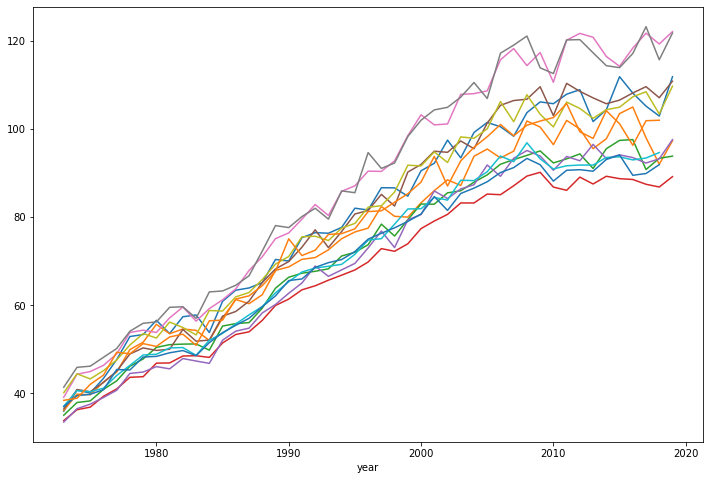

In [14]:
#Long to wide data
pd.pivot_table(data = Electricity_Consume, index = 'year', columns = 'month', values = 'Electricty_Consumption_in_TW').plot(legend=False, figsize = (12,8))

# Checking the seasonality in the Time series data.

<AxesSubplot:xlabel='month'>

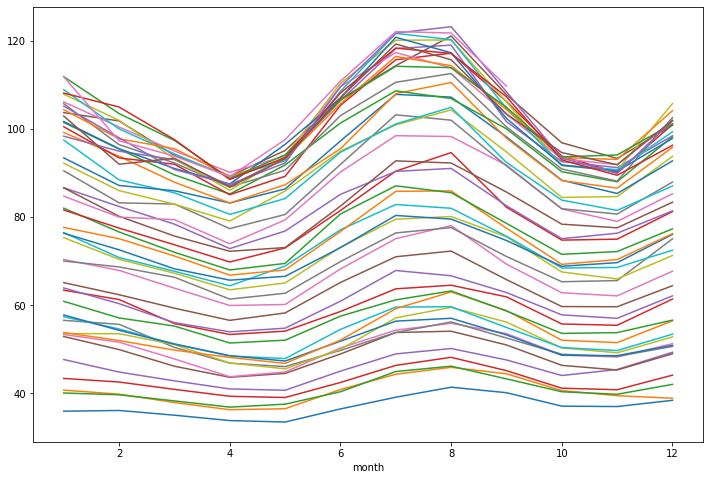

In [15]:
pd.pivot_table(data = Electricity_Consume, index = 'month', columns = 'year', values = 'Electricty_Consumption_in_TW').plot(legend=False, figsize = (12,8))

# Using the Decomposition of Time Series data to work on the Seasonality of data.

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
#We will be using the multiplicative model since we have both trend and seasonality in the data.

In [18]:
decom = seasonal_decompose(Consumption, model='multiplicative')

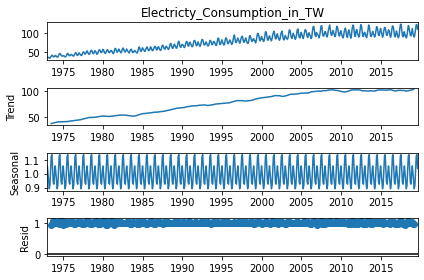

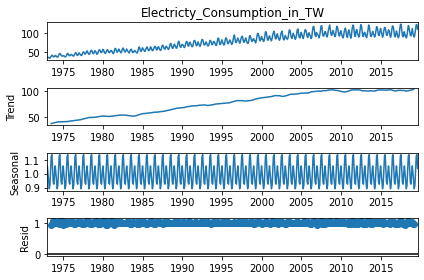

In [19]:
decom.plot()

In [20]:
decomposed = pd.concat([decom.observed, decom.trend, decom.seasonal, decom.resid], axis=1).head(24)
decomposed.columns = ['Actual', 'Trend', 'Seasonality', 'Irregular']
decomposed

,Actual,Trend,Seasonality,Irregular
DATE,,,,
1973-01-01,35.9728,NaN,1.055358,NaN
1973-02-01,36.1334,NaN,0.996086,NaN
1973-03-01,35.0625,NaN,0.945337,NaN
1973-04-01,33.8416,NaN,0.890877,NaN
1973-05-01,33.5107,NaN,0.918780,NaN
1973-06-01,36.4823,NaN,1.030843,NaN
1973-07-01,39.1412,37.223388,1.125749,0.934064
1973-08-01,41.4137,37.576442,1.136105,0.970085
1973-09-01,40.1639,37.850562,1.038776,1.021507


# Seasonal-Trend decomposition using LOESS (STL):

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set_style("darkgrid")
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)

In [22]:
Electricity_Consume.describe()

,Electricty_Consumption_in_TW,year,month
count,561.000000,561.000000,561.000000
mean,76.681764,1995.877005,6.475936
std,22.756474,13.507968,3.448065
min,33.510700,1973.000000,1.000000
25%,55.919700,1984.000000,3.000000
50%,78.417000,1996.000000,6.000000
75%,93.840600,2008.000000,9.000000
max,123.216300,2019.000000,12.000000


In [23]:
Electricity_Consume.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 1973-01-01 to 2019-09-01
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATE                          561 non-null    datetime64[ns]
 1   Electricty_Consumption_in_TW  561 non-null    float64       
 2   year                          561 non-null    int64         
 3   month                         561 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 21.9 KB


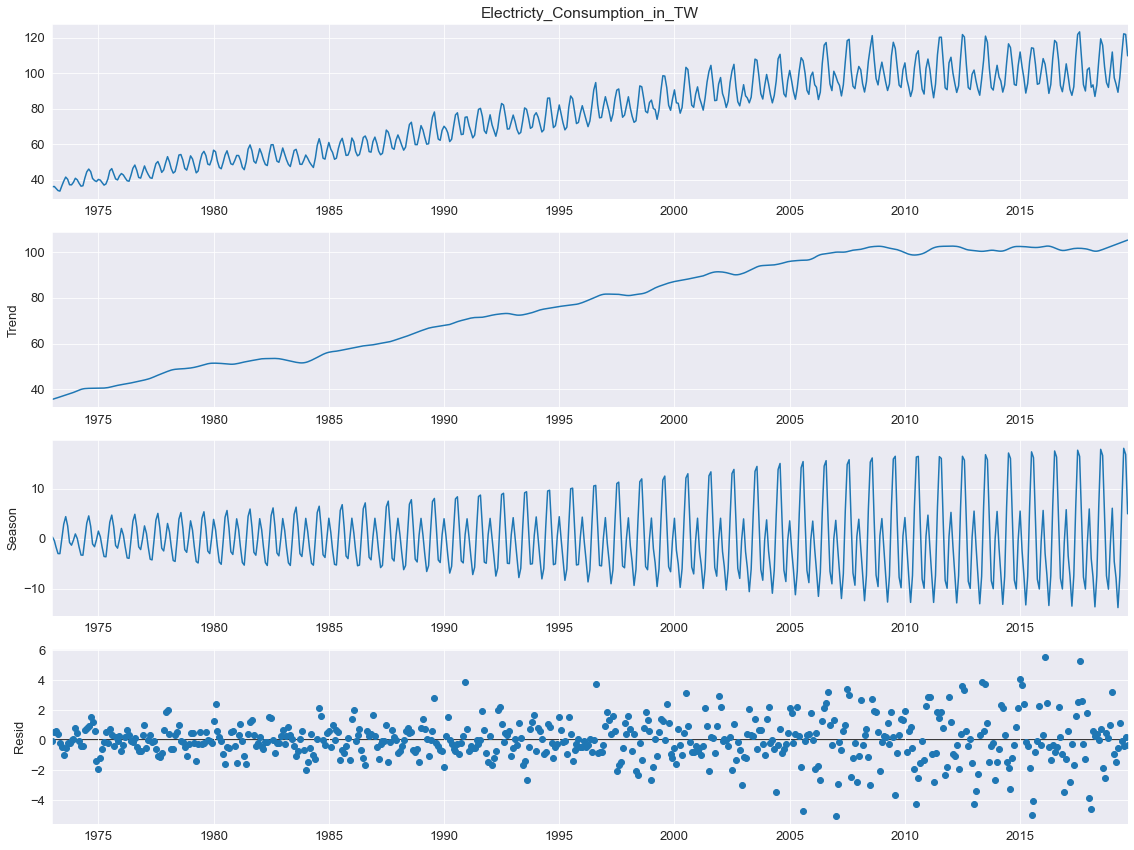

In [24]:
from statsmodels.tsa.seasonal import STL

stl = STL(Consumption, seasonal=13)
res = stl.fit()
fig = res.plot()

# TRAIN- TEST SPLIT

In [25]:
Electricity_Consume.Electricty_Consumption_in_TW

DATE
1973-01-01     35.9728
1973-02-01     36.1334
1973-03-01     35.0625
1973-04-01     33.8416
1973-05-01     33.5107
                ...   
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricty_Consumption_in_TW, Length: 561, dtype: float64

In [26]:
Electricity_Consume.Electricty_Consumption_in_TW.tail(24)

DATE
2017-10-01     93.4264
2017-11-01     89.9026
2017-12-01    101.8836
2018-01-01    102.9398
2018-02-01     92.0095
2018-03-01     93.3526
2018-04-01     86.8386
2018-05-01     93.2361
2018-06-01    107.1009
2018-07-01    119.2874
2018-08-01    115.7108
2018-09-01    103.4070
2018-10-01     94.6492
2018-11-01     91.9079
2018-12-01    101.9883
2019-01-01    111.8520
2019-02-01     97.3261
2019-03-01     93.8406
2019-04-01     89.1873
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricty_Consumption_in_TW, dtype: float64

In [28]:
# getting a training set of 45 years 1973 - 2018
train = Electricity_Consume.Electricty_Consumption_in_TW[:'2018-12-01']
train

DATE
1973-01-01     35.9728
1973-02-01     36.1334
1973-03-01     35.0625
1973-04-01     33.8416
1973-05-01     33.5107
                ...   
2018-08-01    115.7108
2018-09-01    103.4070
2018-10-01     94.6492
2018-11-01     91.9079
2018-12-01    101.9883
Name: Electricty_Consumption_in_TW, Length: 552, dtype: float64

In [30]:
test = Electricity_Consume.Electricty_Consumption_in_TW['2019-01-01':]
test

DATE
2019-01-01    111.8520
2019-02-01     97.3261
2019-03-01     93.8406
2019-04-01     89.1873
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricty_Consumption_in_TW, dtype: float64

In [31]:
decom_train = seasonal_decompose(train, period = 12)

In [32]:
decom_train.observed

DATE
1973-01-01     35.9728
1973-02-01     36.1334
1973-03-01     35.0625
1973-04-01     33.8416
1973-05-01     33.5107
                ...   
2018-08-01    115.7108
2018-09-01    103.4070
2018-10-01     94.6492
2018-11-01     91.9079
2018-12-01    101.9883
Name: Electricty_Consumption_in_TW, Length: 552, dtype: float64

In [33]:
decom_train.seasonal

DATE
1973-01-01     4.019862
1973-02-01    -0.598388
1973-03-01    -4.377311
1973-04-01    -8.666095
1973-05-01    -6.042497
                ...    
2018-08-01    10.747709
2018-09-01     2.913713
2018-10-01    -5.064766
2018-11-01    -6.086641
2018-12-01     0.116754
Name: seasonal, Length: 552, dtype: float64

<AxesSubplot:xlabel='DATE'>

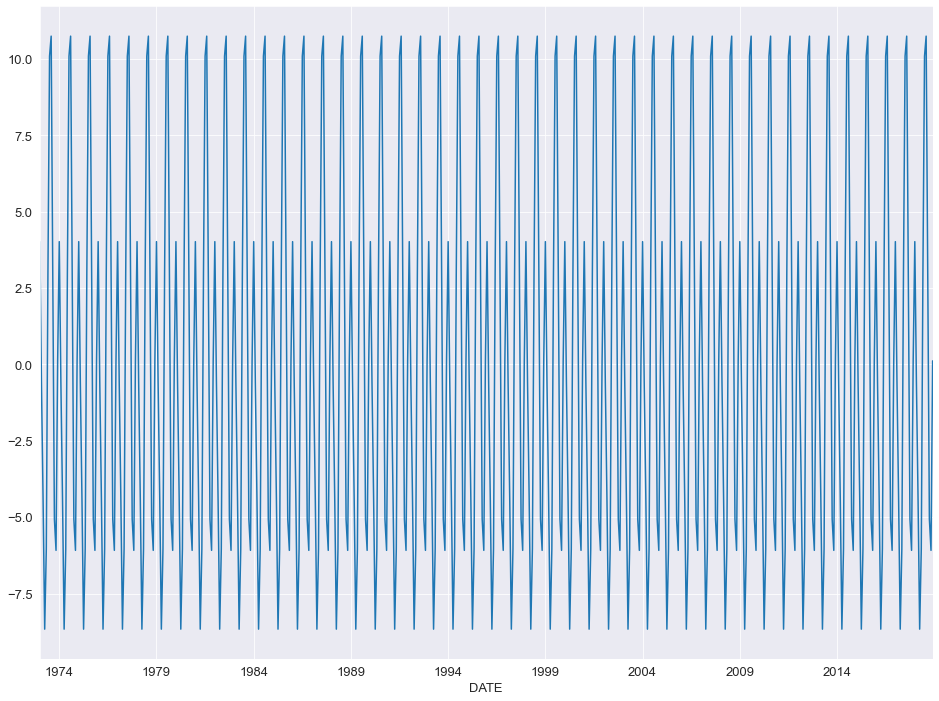

In [34]:
decom_train.seasonal.plot()

# ETS MODEL: ExponenTial Smoothening

In [35]:
train

DATE
1973-01-01     35.9728
1973-02-01     36.1334
1973-03-01     35.0625
1973-04-01     33.8416
1973-05-01     33.5107
                ...   
2018-08-01    115.7108
2018-09-01    103.4070
2018-10-01     94.6492
2018-11-01     91.9079
2018-12-01    101.9883
Name: Electricty_Consumption_in_TW, Length: 552, dtype: float64

In [36]:
#ETS models
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [37]:
ets_model = ExponentialSmoothing(train, 
                                 trend='mul', 
                                 seasonal='mul', 
                                 seasonal_periods=12).fit(smoothing_level=0.1,     # alpha
                                                          smoothing_slope=0.6,     # beta
                                                          smoothing_seasonal=0.2   # gamma
                                                         )

E:\PYTHON SETUP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\PYTHON SETUP\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [40]:
ets_model.forecast(9)

2019-01-01    103.918087
2019-02-01     97.078842
2019-03-01     93.200485
2019-04-01     87.555415
2019-05-01     93.432318
2019-06-01    107.974969
2019-07-01    119.235748
2019-08-01    118.391808
2019-09-01    106.188999
Freq: MS, dtype: float64

In [41]:
test

DATE
2019-01-01    111.8520
2019-02-01     97.3261
2019-03-01     93.8406
2019-04-01     89.1873
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricty_Consumption_in_TW, dtype: float64

In [43]:
np.abs(test.values - ets_model.forecast(9).values)/test.values

array([0.07093224, 0.00254051, 0.0068213 , 0.01829728, 0.04256433,
       0.02600652, 0.02346945, 0.02779429, 0.0321731 ])

In [44]:
np.mean(np.abs(test.values - ets_model.forecast(9).values)/test.values)

0.02784433580531957

***2.7% of Mean Absolute Percentage Error is permissible.***

# Building the SARIMA model to  check the accuracy and forecast the values for next two years on month by month basis.

In [45]:
from statsmodels.tsa.stattools import acf, pacf_ols

In [46]:
train

DATE
1973-01-01     35.9728
1973-02-01     36.1334
1973-03-01     35.0625
1973-04-01     33.8416
1973-05-01     33.5107
                ...   
2018-08-01    115.7108
2018-09-01    103.4070
2018-10-01     94.6492
2018-11-01     91.9079
2018-12-01    101.9883
Name: Electricty_Consumption_in_TW, Length: 552, dtype: float64

In [47]:
#Auto-Correlation Factor
acf(train)

array([1.        , 0.95743424, 0.8822484 , 0.83628089, 0.84918019,
       0.89402814, 0.91434806, 0.88415575, 0.83092541, 0.81075554,
       0.84838631, 0.91366489, 0.94348418, 0.9035457 , 0.83182738,
       0.78779538, 0.80146184, 0.84550757, 0.86542355, 0.83591452,
       0.78401768, 0.76352786, 0.79989273, 0.86219007, 0.89000845,
       0.8519554 , 0.78255803, 0.74002095])

In [48]:
len(acf(train))

28

In [49]:
train

DATE
1973-01-01     35.9728
1973-02-01     36.1334
1973-03-01     35.0625
1973-04-01     33.8416
1973-05-01     33.5107
                ...   
2018-08-01    115.7108
2018-09-01    103.4070
2018-10-01     94.6492
2018-11-01     91.9079
2018-12-01    101.9883
Name: Electricty_Consumption_in_TW, Length: 552, dtype: float64

In [50]:
acf(train)[:5]

array([1.        , 0.95743424, 0.8822484 , 0.83628089, 0.84918019])

In [52]:
import statsmodels.tsa.api as smt

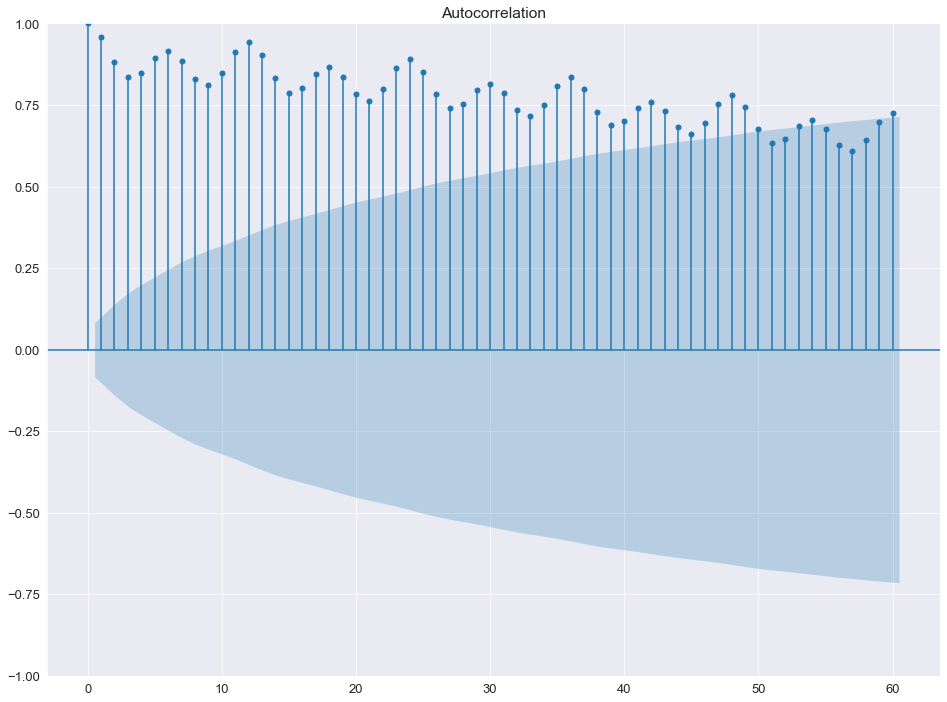

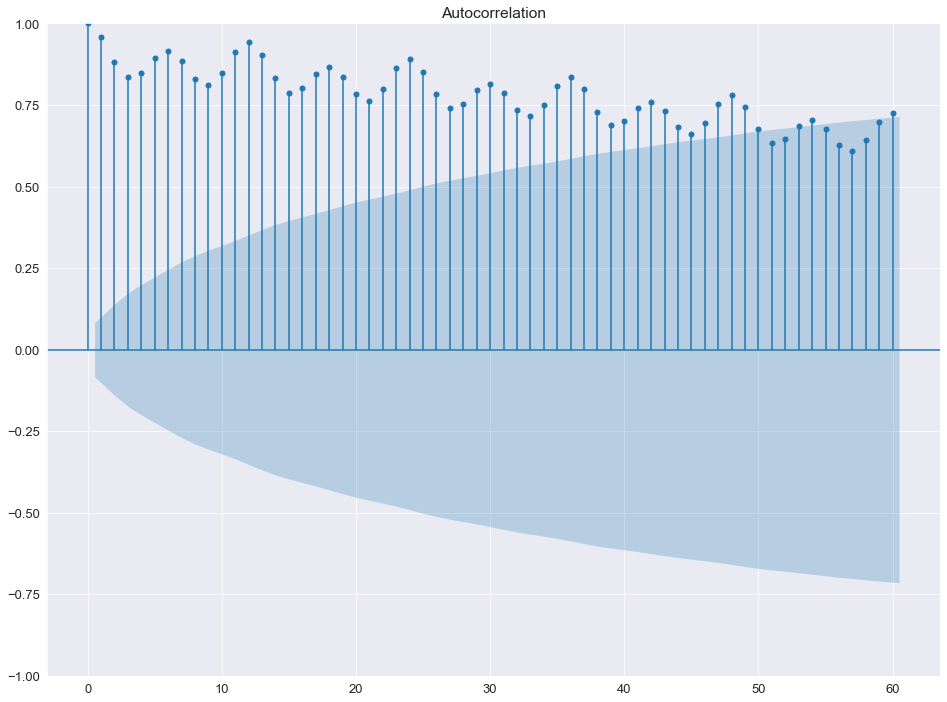

In [53]:
smt.graphics.plot_acf(train, lags = 60)

# Augmented Dickey Fuller Test.

***Null hypothesis: Time Series data is not stationary.***
    
***Alternate hypothesis : Time Series data is stationary.***
    
***Confidence interval : 95%***
    
***p-value : 0.05***

In [54]:
# Dickey-Fuller test can also help with finding whther my series is stationary of not
from statsmodels.tsa.stattools import adfuller
adfuller(train)

(-2.0702089130999646,
 0.25666120361577216,
 15,
 536,
 {'1%': -3.442609129942274,
  '5%': -2.866947348175723,
  '10%': -2.569649926626197},
 2241.126640184177)

**p value is high 0.25 means we cannot reject the null hypothesis - Time Series is NOT stationary.**

**Given p value here is 0.25 it means that our series is not stationary.**

**We would perform log transformation :**

In [55]:
train_ln = np.log(train)
adfuller(train_ln)

(-3.177976418799607,
 0.02129541007237177,
 15,
 536,
 {'1%': -3.442609129942274,
  '5%': -2.866947348175723,
  '10%': -2.569649926626197},
 -2480.0754859254694)

**p-value = 0.021 <<< 0.05, now we can reject the null hypothesis. Thus, our data has become stationary.**

In [56]:
train

DATE
1973-01-01     35.9728
1973-02-01     36.1334
1973-03-01     35.0625
1973-04-01     33.8416
1973-05-01     33.5107
                ...   
2018-08-01    115.7108
2018-09-01    103.4070
2018-10-01     94.6492
2018-11-01     91.9079
2018-12-01    101.9883
Name: Electricty_Consumption_in_TW, Length: 552, dtype: float64

In [57]:
train_ln

DATE
1973-01-01    3.582763
1973-02-01    3.587218
1973-03-01    3.557132
1973-04-01    3.521691
1973-05-01    3.511865
                ...   
2018-08-01    4.751094
2018-09-01    4.638673
2018-10-01    4.550177
2018-11-01    4.520787
2018-12-01    4.624858
Name: Electricty_Consumption_in_TW, Length: 552, dtype: float64

In [58]:
stationary_series = train_ln

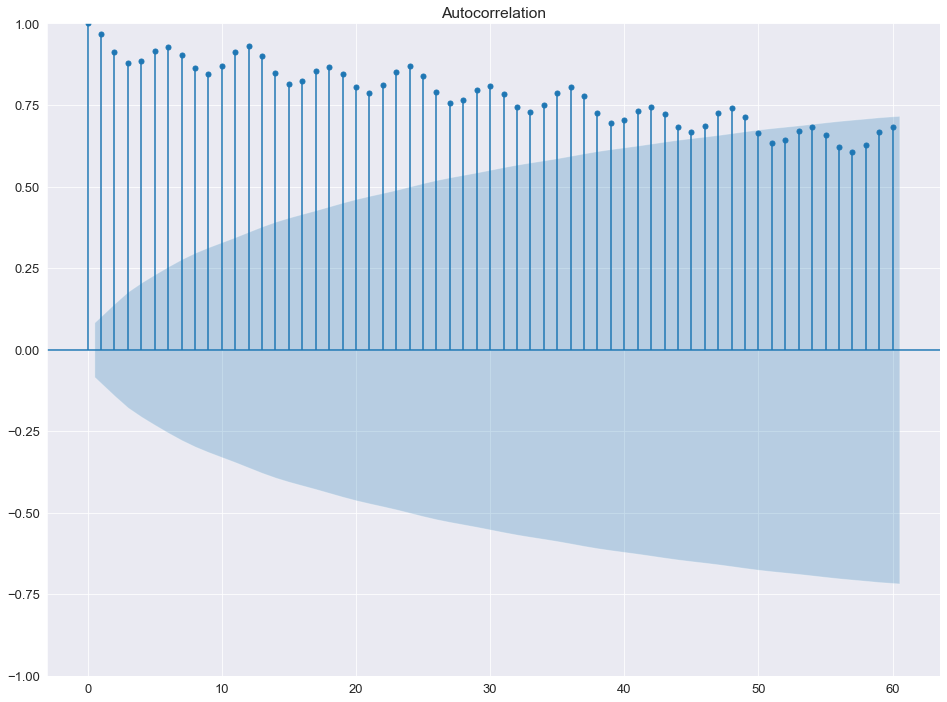

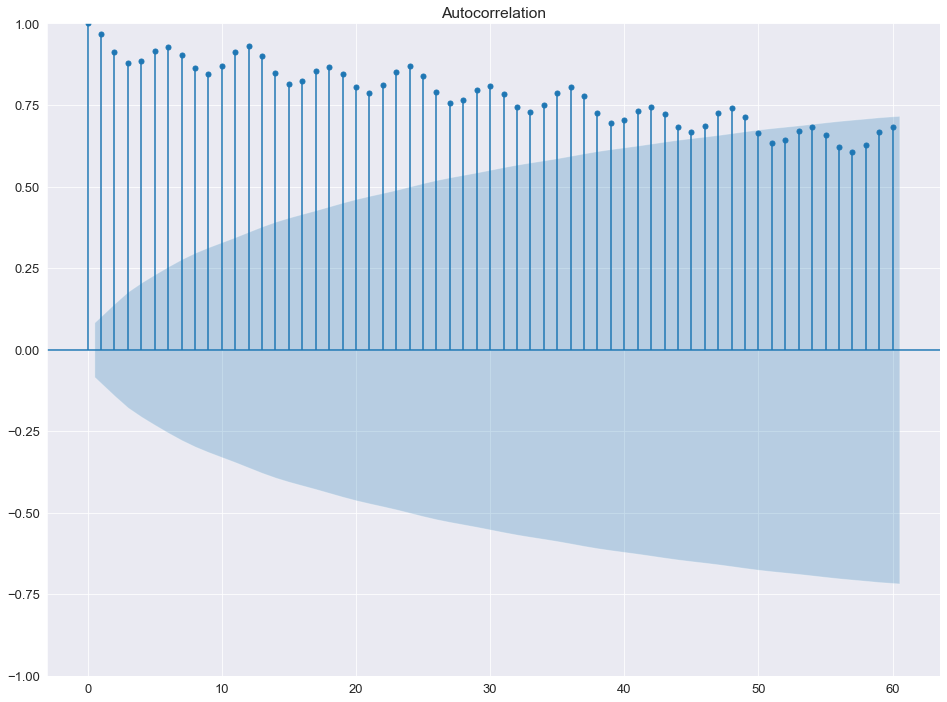

In [59]:
smt.graphics.plot_acf(stationary_series, lags = 60)

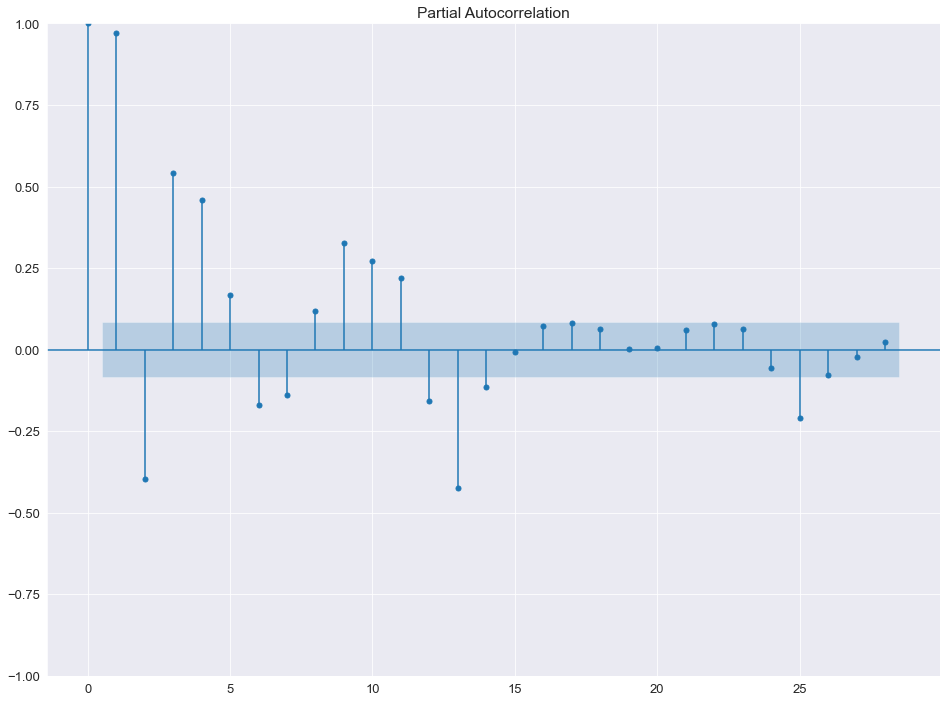

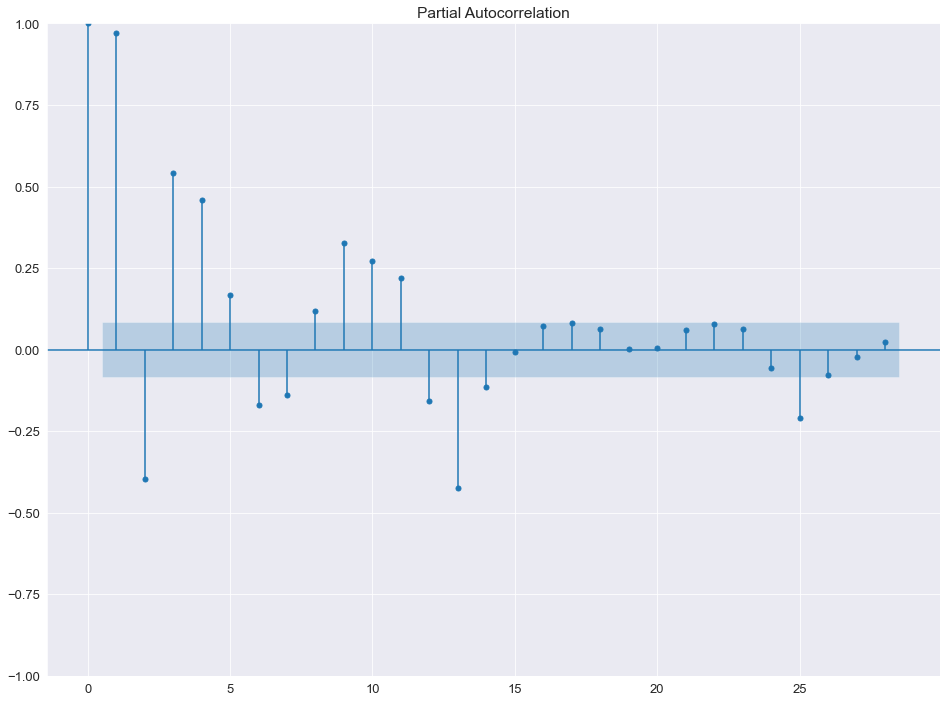

In [60]:
smt.graphics.plot_pacf(stationary_series)

In [ ]:
# value of d = 0
# value of p and value of q = 1
# seasonal component = 12

In [61]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(stationary_series, order = (1,0,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

E:\PYTHON SETUP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\PYTHON SETUP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [62]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:       Electricty_Consumption_in_TW   No. Observations:                  552
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                1302.428
Date:                            Wed, 09 Nov 2022   AIC                          -2594.856
Time:                                    14:50:35   BIC                          -2573.416
Sample:                                01-01-1973   HQIC                         -2586.469
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9488      0.014     65.747      0.000       0.920       0.977
ma.L1         -0.1397      0.046   

In [76]:
stlf = STLForecast(train, ARIMA, model_kwargs={"order": (1, 0, 1)})
res = stlf.fit()
forecasts = res.forecast(33)

E:\PYTHON SETUP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\PYTHON SETUP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\PYTHON SETUP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [77]:
forecasts

2019-01-01    104.067980
2019-02-01     95.158153
2019-03-01     92.692861
2019-04-01     87.032420
2019-05-01     92.840925
2019-06-01    108.610515
2019-07-01    120.828502
2019-08-01    119.433100
2019-09-01    106.382166
2019-10-01     94.771116
2019-11-01     91.309249
2019-12-01    101.853421
2020-01-01    103.903419
2020-02-01     94.993679
2020-03-01     92.528473
2020-04-01     86.868119
2020-05-01     92.676711
2020-06-01    108.446388
2020-07-01    120.664461
2020-08-01    119.269146
2020-09-01    106.218298
2020-10-01     94.607334
2020-11-01     91.145554
2020-12-01    101.689812
2021-01-01    103.739897
2021-02-01     94.830242
2021-03-01     92.365123
2021-04-01     86.704855
2021-05-01     92.513533
2021-06-01    108.283296
2021-07-01    120.501455
2021-08-01    119.106226
2021-09-01    106.055464
Freq: MS, dtype: float64

In [78]:
#Prediction of electricity consumption in next two years.
forecasts.tail(24)

2019-10-01     94.771116
2019-11-01     91.309249
2019-12-01    101.853421
2020-01-01    103.903419
2020-02-01     94.993679
2020-03-01     92.528473
2020-04-01     86.868119
2020-05-01     92.676711
2020-06-01    108.446388
2020-07-01    120.664461
2020-08-01    119.269146
2020-09-01    106.218298
2020-10-01     94.607334
2020-11-01     91.145554
2020-12-01    101.689812
2021-01-01    103.739897
2021-02-01     94.830242
2021-03-01     92.365123
2021-04-01     86.704855
2021-05-01     92.513533
2021-06-01    108.283296
2021-07-01    120.501455
2021-08-01    119.106226
2021-09-01    106.055464
Freq: MS, dtype: float64

E:\PYTHON SETUP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\PYTHON SETUP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\PYTHON SETUP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


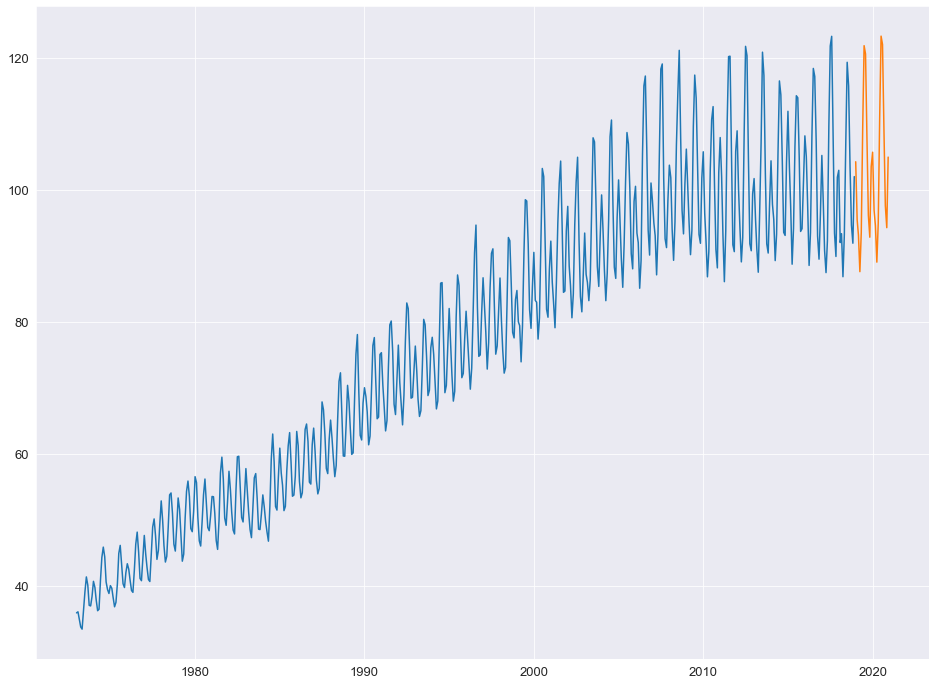

In [79]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast

stlf = STLForecast(train, ARIMA, model_kwargs=dict(order=(1, 0, 1), trend="t"))
stlf_res = stlf.fit()

forecast = stlf_res.forecast(24)
plt.plot(train)
plt.plot(forecast)
plt.show()